In [1]:
from mnist import MNIST
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import math
mndata = MNIST('Samples')
mndata.gz = True

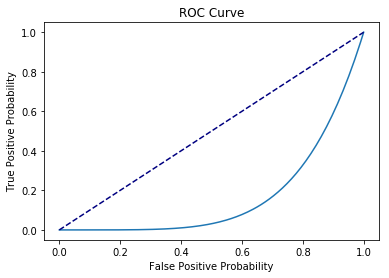

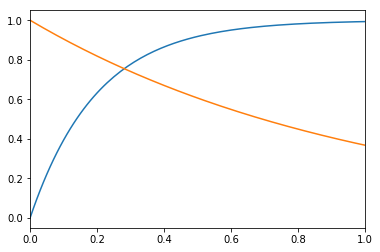

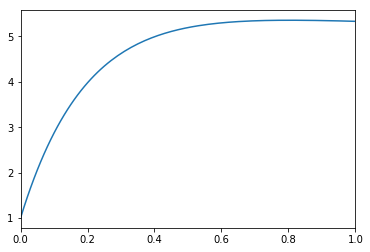

0
1.0


In [27]:
#intialize t values
t_range = np.linspace(0,10,1000)

#probability of miss detection and false alarm with respect to t
Pmd = 1- np.exp(-5*t_range)
Pfa = np.exp(-t_range)

#plot probability of false alarm on x axis and and probability of true positie on y axis 
plt.plot(Pfa,1-Pmd)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Probability')
plt.ylabel('True Positive Probability')
plt.title('ROC Curve')
plt.show()

plt.plot(t_range,Pmd)
plt.plot(t_range,Pfa)
plt.xlim(0,1)
plt.show()

cost = 5*Pmd+Pfa
plt.plot(t_range,(5*Pmd+Pfa))
plt.xlim(0,1)
plt.show()
diff = Pfa-Pmd
print(np.argmax(diff))
print(cost[0])

In [3]:
#load testing and training data from mnist data
testimages, testlabels = mndata.load_testing()
trainimages, trainlabels = mndata.load_training()

In [4]:
print('Label:{}'.format(trainlabels[2]))
print(mndata.display(trainimages[2]))

Label:4

............................
............................
............................
............................
............................
.....................@......
............................
.....................@......
....@...............@.......
....@...............@.......
....@...............@.......
....@..............@@.......
....@..............@@.......
....@.............@@........
....@.........@@@.@@........
....@@@@@@@@@.....@@........
..................@@........
..................@.........
..................@.........
..................@.........
..................@.........
..................@.........
..................@.........
..................@.........
..................@.........
............................
............................
............................


In [5]:
#randomly sample about 5% of the training set
msk = np.random.rand(len(trainimages)) < 0.05
testimages = np.array(testimages)
trainimages = np.array(trainimages)
testlabels = np.array(testlabels)
trainlabels = np.array(trainlabels)
trainimages = np.array(trainimages[msk])
trainlabels = np.array(trainlabels[msk])

In [6]:
#import algorithms to use
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, zero_one_loss
import time

In [7]:
#perform one hot encoding on the labels
onehotlabel = np.zeros((trainlabels.shape[0],10))
onehotlabel[np.arange(trainlabels.shape[0]),trainlabels] = 1

In [8]:
def linreg():
    linearReg = LinearRegression()
    start = time.time()
    linearReg.fit(trainimages,onehotlabel)
    end = time.time()

    testPred = np.zeros(len(testimages))
    for i in range(len(testimages)):
        testPred[i] = np.argmax(linearReg.predict([testimages[i]])[0])

    trainPred = np.zeros(len(trainimages))
    for i in range(len(trainimages)):
        trainPred[i] = np.argmax(linearReg.predict([trainimages[i]])[0])

    lrtime = end-start
    lrtrainerr = 1 - accuracy_score(trainlabels,trainPred)
    lrtesterr = 1 - accuracy_score(testlabels,testPred)
    
    return lrtime, lrtrainerr, lrtesterr

In [9]:
def logreg():
    logReg = LogisticRegression(solver = 'lbfgs',multi_class ='auto')
    start = time.time()
    logReg.fit(trainimages,trainlabels)
    end = time.time()

    logTestPred = logReg.predict(testimages)
    logTrainPred = logReg.predict(trainimages)

    lgtime = end-start
    lgtrainerr = 1 - accuracy_score(trainlabels,logTrainPred)
    lgtesterr = 1 - accuracy_score(testlabels,logTestPred)

    return lgtime, lgtrainerr, lgtesterr

In [10]:
def lda():
    lda = LinearDiscriminantAnalysis()
    start = time.time()
    lda.fit(trainimages,trainlabels)
    end = time.time()

    testPredLDA = lda.predict(testimages)
    trainPredLDA = lda.predict(trainimages)

    ldatime = end-start
    ldatrainerr = 1 - accuracy_score(trainlabels,trainPredLDA)
    ldatesterr = 1 - accuracy_score(testlabels,testPredLDA)

    return ldatime,ldatrainerr,ldatesterr

In [16]:
def svc(gam):

    svc = SVC(gamma = gam)
    start = time.time()
    svc.fit(trainimages,trainlabels)
    end = time.time()

    testPredSVC = svc.predict(testimages)
    trainPredSVC = svc.predict(trainimages)


    svctime = end-start
    svctrainerr = 1 - accuracy_score(trainlabels,trainPredSVC)
    svctesterr = 1 - accuracy_score(testlabels,testPredSVC)

    return svctime,svctrainerr,svctesterr

In [12]:
def lsvc():
    lsvc = LinearSVC()
    start = time.time()
    lsvc.fit(trainimages,trainlabels)
    end = time.time()

    testPredLSVC = lsvc.predict(testimages)
    trainPredLSVC = lsvc.predict(trainimages)

    lsvctime = end-start
    lsvctrainerr = 1 - accuracy_score(trainlabels,trainPredLSVC)
    lsvctesterr = 1 - accuracy_score(testlabels,testPredLSVC)

    return lsvctime,lsvctrainerr,lsvctesterr

In [13]:
def rf(tree):
    rf = RandomForestClassifier(n_estimators=tree)
    start = time.time()
    rf.fit(trainimages,trainlabels)
    end = time.time()

    testPredRF = rf.predict(testimages)
    trainPredRF = rf.predict(trainimages)

    rftime = end-start
    rftrainerr = 1 - accuracy_score(trainlabels,trainPredRF)
    rftesterr = 1 - accuracy_score(testlabels,testPredRF)

    return rftime,rftrainerr,rftesterr

In [14]:
est = np.log(25)/4
Pmd = np.exp(-5*est)
Pfa = np.exp(-est)
print(est)
print(Pmd)
print(Pfa)

0.8047189562170501
0.01788854381999832
0.447213595499958


In [17]:
gamma = 0.000001
tree = 50

linRegTime = [None] * 10
linRegTrainEr = [None] * 10
linRegTestEr = [None] * 10
logRegTime = [None] * 10
logRegTrainEr = [None] * 10
logRegTestEr = [None] * 10
ldaTime = [None] * 10
ldaTrainEr = [None] * 10
ldaTestEr = [None] * 10
svcTime = [None] * 10
svcTrainEr = [None] * 10
svcTestEr = [None] * 10
lsvcTime = [None] * 10
lsvcTrainEr = [None] * 10
lsvcTestEr = [None] * 10
rfTime = [None] * 10
rfTrainEr = [None] * 10
rfTestEr = [None] * 10
for x in range(0, 10):
    linRegTime,linRegTrainEr, linRegTestEr = linreg()
    
    logRegTime, logRegTrainEr, logRegTestEr = logreg()
    
    ldaTime, ldaTrainEr, ldaTestEr = lda()
    
    svcTime, svcTrainEr, svcTestEr = svc(gamma)

    lsvcTime,lsvcTrainEr,lsvcTestEr = lsvc()
    
    rfTime, rfTrainEr, rfTestEr = rf(tree)

    

/Users/suhwanchoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/suhwanchoi/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/suhwanchoi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/suhwanchoi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/suhwanchoi/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/

In [34]:
print('The average training time for linear regression: {}'.format(np.mean(linRegTime)))
print('The average model training error for linear regression: {}'.format(np.mean(linRegTrainEr)))
print('The average model testing error for linear regression: {}'.format(np.mean(linRegTestEr)))

print('The average training time for logistic regression: {}'.format(np.mean(logRegTime)))
print('The average model training error for logistic regression: {}'.format(np.mean(logRegTrainEr)))
print('The average model testing error for logistic regression: {}'.format(np.mean(logRegTestEr)))

print('The average training time for LDA: {}'.format(np.mean(ldaTime)))
print('The average model training error for LDA: {}'.format(np.mean(ldaTrainEr)))
print('The average model testing error for LDA: {}'.format(np.mean(ldaTestEr)))

print('The average training time for SVC: {}'.format(np.mean(svcTime)))
print('The average model training error for SVC: {}'.format(np.mean(svcTrainEr)))
print('The average model testing error for SVC: {}'.format(np.mean(svcTestEr)))

print('The average training time for linear SVC: {}'.format(np.mean(lsvcTime)))
print('The average model training error for linear SVC: {}'.format(np.mean(lsvcTrainEr)))
print('The average model testing error for linear SVC: {}'.format(np.mean(lsvcTestEr)))

print('The average training time for Random Forest: {}'.format(np.mean(rfTime)))
print('The average model training error for Random Forest: {}'.format(np.mean(rfTrainEr)))
print('The average model testing error for Random Forest: {}'.format(np.mean(rfTestEr)))


The average training time for linear regression: 0.209075927734375
The average model training error for linear regression: 0.06966369251887439
The average model testing error for linear regression: 0.1986
The average training time for logistic regression: 0.578467845916748
The average model training error for logistic regression: 0.0
The average model testing error for logistic regression: 0.129
The average training time for LDA: 0.5831048488616943
The average model training error for LDA: 0.06280027453671932
The average model testing error for LDA: 0.1824
The average training time for SVC: 13.875026226043701
The average model training error for SVC: 0.0
The average model testing error for SVC: 0.08320000000000005
The average training time for linear SVC: 1.1613731384277344
The average model training error for linear SVC: 0.00034317089910773646
The average model testing error for linear SVC: 0.17179999999999995
The average training time for Random Forest: 0.5060811042785645
The average

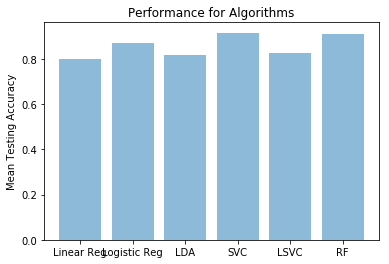

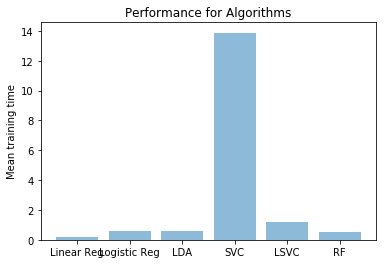

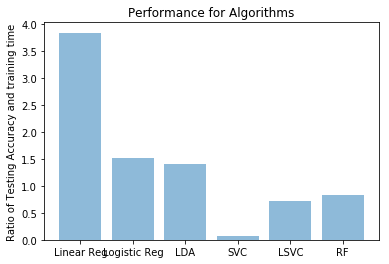

In [33]:
objects = ('Linear Reg', 'Logistic Reg', 'LDA', 'SVC', 'LSVC', 'RF')
y_pos = np.arange(len(objects))
performance = [1-np.mean(linRegTestEr),1-np.mean(logRegTestEr),1-np.mean(ldaTestEr),1-np.mean(svcTestEr),
                                                                1-np.mean(lsvcTestEr),np.mean(rfTestEr)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean Testing Accuracy')
plt.title('Performance for Algorithms')

plt.show()

y_pos = np.arange(len(objects))
performance = [np.mean(linRegTime),np.mean(logRegTime),np.mean(ldaTime),np.mean(svcTime),np.mean(lsvcTime),np.mean(rfTime)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Mean training time')
plt.title('Performance for Algorithms')

plt.show()

y_pos = np.arange(len(objects))
performance = [(1-np.mean(linRegTestEr))/np.mean(linRegTime),(1-np.mean(logRegTestEr))/np.mean(logRegTime)
                                                             ,(1-np.mean(ldaTestEr))/np.mean(ldaTime),
                                                               (1-np.mean(svcTestEr))/np.mean(svcTime),
                                                                (1-np.mean(lsvcTestEr))/np.mean(lsvcTime),
                                                                 (1-np.mean(rfTestEr))/np.mean(rfTime)]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Ratio of Testing Accuracy and training time')
plt.title('Performance for Algorithms')

plt.show()
            

In [26]:
trainimages.shape

(2914, 784)

In [28]:
x,y,z = svc('scale')

In [29]:
np.mean(z)

0.8934